In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Input data - [X coordinate, Y coordinate]
X = np.array([[1.6,0.3], [1.8,0.5], [2.0,0.7], [2.2,0.4], [2.4,0.6], [2.3,0.5], [2.1,0.5],
              [1.7,1.7], [2.5,1.0], [1.0,3.0], [2.0,1.5], [1.5,1.5], [1.5,2.0], [1.0,2.5],
              [1.6,1.6], [2.4,0.9], [0.9,2.9], [1.9,1.4], [1.0,1.4], [1.4,1.9], [0.9,2.4],
              [1.5,1.7], [2.3,1.1], [0.4,1.0], [1.0,0.7], [1.2,1.5], [1.2,1.0], [1.0,1.1],
              [1.0,1.7], [1.3,1.1], [0.7,1.0], [0.4,0.7], [0.2,1.5], [0.2,1.0], [0.4,1.1],
              [1.0,0.5], [1.3,0.1], [0.7,0.3], [0.4,0.4], [0.2,0.5], [0.2,0.1], [0.4,0.1],
              [1.0,2.4], [1.3,2.1], [0.7,2.0], [0.4,2.7], [0.2,2.5], [0.2,2.0], [0.4,2.1],
              [3.4,2.0], [3.5,2.1], [3.6,2.3], [3.4,2.4], [3.5,2.5], [3.1,2.6], [3.3,2.7],
              [2.0,3.1], [3.5,1.0], [4.0,1.5], [3.0,3.0], [3.0,2.0], [2.5,2.5], [3.3,1.5],
              [3.9,2.5], [3.9,2.0], [3.8,3.0], [3.8,2.9], [3.9,2.7], [3.9,2.5], [3.9,2.7],
              [2.1,3.1], [3.6,1.1], [3.8,1.7], [3.2,3.1], [2.9,2.1], [2.6,2.4], [3.2,1.4],
              [4.0,0.1], [3.9,0.2], [3.9,0.3], [3.7,0.5], [3.9,0.7], [3.9,0.4], [3.7,0.4]])

# Labels (1 or -1)
Y = np.array([-1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              -1, -1, -1, -1, -1, -1, -1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1])

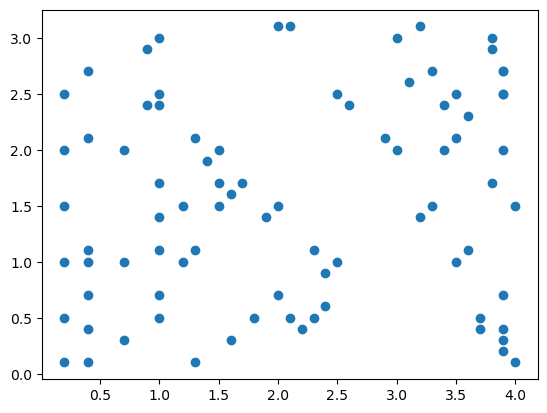

In [12]:
x = [pt[0] for pt in X]
y = [pt[1] for pt in X]

# Create a scatter plot
plt.scatter(x, y)

In [13]:
def train_svm(X, Y, epochs=10000):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))

    # The learning rate
    learning_rate = 1
    
    # See the change
    w0_per_epoch = []
    w1_per_epoch = []
    
    # Training
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            # It there is an error
            if (Y[i] * np.dot(X[i], w)) < 1:
                w = w + learning_rate * ((X[i] * Y[i]) + (-2 * (1/epochs) * w))
            else:
                w = w + learning_rate * (-2 * (1/epochs) * w)
                
        w0_per_epoch.append(w[0])
        w1_per_epoch.append(w[1])
    
    return w, w0_per_epoch, w1_per_epoch

In [14]:
w, w0array, w1array = train_svm(X, Y, epochs=10000)

In [15]:
# You cannot see anything in the graph of 10000 numbers :)
epochs = len(w0array)

# It will divide epochs to this number
number_of_weights_to_graph = 100

num_per_epoch = epochs/number_of_weights_to_graph

w0_to_graph = []
w1_to_graph = []
epoch_to_graph = []

for i in range(number_of_weights_to_graph):
    epoch_to_graph.append(int(num_per_epoch*i))
    w0_to_graph.append(w0array[int(num_per_epoch*i)])
    w1_to_graph.append(w1array[int(num_per_epoch*i)])
    
# plt.plot(epoch_to_graph, w0_to_graph, 'r',epoch_to_graph, w1_to_graph,'b')

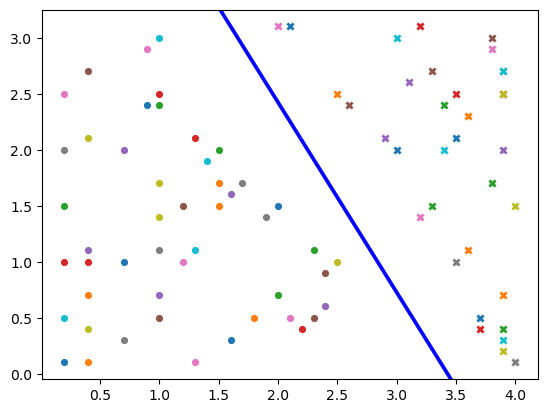

In [16]:
# For every point mark point with - if label is -1 and mark with + if label is 1
for i in range(len(X)):
    if Y[i] == -1:
        plt.scatter(X[i][0], X[i][1], s=10, marker='o', linewidths=2)
    else:
        plt.scatter(X[i][0], X[i][1], s=20, marker='x', linewidths=2)

# Print the hyperplane calculated by svm_sgd()
x2=[w[0]*0.65,w[1],-w[1],w[0]]
x3=[w[0]*0.65,w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')